In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import re
import numpy as np
from scipy import stats
import statsmodels.api as sm
import seaborn

seaborn.set()



In [2]:
#Loading the data from the CSV file into a dataframe 
df1= pd.read_csv('dog_rates_tweets.csv')
df1

,id,created_at,text
0,994677639364403200,2018-05-10 20:36:44,@Steff88979267 tell them to h*ck off
1,994364904978239488,2018-05-09 23:54:02,@NFLOwnerGBP take it back
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...
3,994336722875047936,2018-05-09 22:02:03,@rachaellanaghan ❤️
4,994024065982717952,2018-05-09 01:19:40,This is Captain Jack Wobbles. He is currently ...
...,...,...,...
11710,1091789851282665472,2019-02-02 20:05:59,This is Cadogan. He’s had the same morning rou...
11711,1091772144927666176,2019-02-02 18:55:38,@mayapolarbear 6/5 stars
11712,1091425960606367745,2019-02-01 20:00:01,@Acallofthevoid 🤗
11713,1091417463512678400,2019-02-01 19:26:15,@jaytay777 OLIVER!!! you’re doing so well budd...


In [3]:
data = df1.text.str.extract(r'(\d+(\.\d+)?)/10')
#Dropping all rows containing Nan
data.dropna(subset=[0], axis = 0 , inplace= True)
#Converting object datatype of the column to float datatype
data=pd.to_numeric(data[0])
data

2        14.0
7        13.0
8        14.0
24       13.0
30       13.0
         ... 
11631    15.0
11638    14.0
11665    13.0
11666    13.0
11672    12.0
Name: 0, Length: 1877, dtype: float64

In [4]:
#Cleaning the data further
mask=data<25
data=data[mask]
data

2        14.0
7        13.0
8        14.0
24       13.0
30       13.0
         ... 
11631    15.0
11638    14.0
11665    13.0
11666    13.0
11672    12.0
Name: 0, Length: 1871, dtype: float64

In [5]:
df1['Ratings']=data
#To display the data without Nan
df1 = df1.dropna()
df1
#df1.info()

,id,created_at,text,Ratings
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0
...,...,...,...,...
11631,1096203765189726208,2019-02-15 00:25:18,"honorary 15/10 for Oppy, the very good space r...",15.0
11638,1095730341828915200,2019-02-13 17:04:05,This is George. He doesn’t chew socks. He just...,14.0
11665,1093636946046242817,2019-02-07 22:25:41,@Panthers @Proud_KCS 13/10 easy,13.0
11666,1093636812818472960,2019-02-07 22:25:09,RT @GeekandSundry: .@Dog_Rates Announces a New...,13.0


In [6]:
# Converting created_at column to a datetime value
df1['created_at']= pd.to_datetime(df1['created_at'],format="%Y-%m-%d %H:%M:%S") 
df1

<ipython-input-6-85ff53968959>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['created_at']= pd.to_datetime(df1['created_at'],format="%Y-%m-%d %H:%M:%S")


,id,created_at,text,Ratings
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0
...,...,...,...,...
11631,1096203765189726208,2019-02-15 00:25:18,"honorary 15/10 for Oppy, the very good space r...",15.0
11638,1095730341828915200,2019-02-13 17:04:05,This is George. He doesn’t chew socks. He just...,14.0
11665,1093636946046242817,2019-02-07 22:25:41,@Panthers @Proud_KCS 13/10 easy,13.0
11666,1093636812818472960,2019-02-07 22:25:09,RT @GeekandSundry: .@Dog_Rates Announces a New...,13.0


In [7]:
def to_timestamp(t):
    return t.timestamp()
df1['timestamp'] = df1['created_at'].apply(to_timestamp)
df1


<ipython-input-7-ce12edb4fa0e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['timestamp'] = df1['created_at'].apply(to_timestamp)


,id,created_at,text,Ratings,timestamp
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525910e+09
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525797e+09
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525735e+09
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525394e+09
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525285e+09
...,...,...,...,...,...
11631,1096203765189726208,2019-02-15 00:25:18,"honorary 15/10 for Oppy, the very good space r...",15.0,1.550190e+09
11638,1095730341828915200,2019-02-13 17:04:05,This is George. He doesn’t chew socks. He just...,14.0,1.550077e+09
11665,1093636946046242817,2019-02-07 22:25:41,@Panthers @Proud_KCS 13/10 easy,13.0,1.549578e+09
11666,1093636812818472960,2019-02-07 22:25:09,RT @GeekandSundry: .@Dog_Rates Announces a New...,13.0,1.549578e+09


In [8]:
fit = stats.linregress(df1['timestamp'], df1['Ratings'])
fit.slope, fit.intercept

(2.2983031752244575e-08, -22.445058882763483)

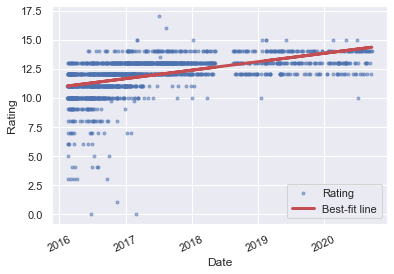

In [16]:
plt.xticks(rotation=25)
x=df1['created_at'].values
y1= df1['Ratings']
plt.plot(x,y1, 'b.', alpha=0.5)
y2=df1['timestamp']*fit.slope + fit.intercept
plt.plot(x, y2, 'r-', linewidth=3)
plt.legend(['Rating','Best-fit line'],prop={'size':11})
plt.xlabel('Date')
plt.ylabel('Rating')
plt.show()

In [17]:
pval=fit.pvalue
print(pval)

3.793798773108244e-121


In [18]:
#From lecture notes
y= df1['Ratings']
x= df1['timestamp']
residuals = y - (fit.slope*x + fit.intercept)


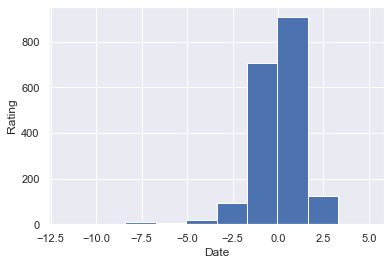

In [19]:
plt.hist(residuals)
plt.xlabel('Date')
plt.ylabel('Rating')
plt.show()